# pandas - data manipulation and analysis with dataframes

[pandas.pydata.org](https://pandas.pydata.org/)

Pandas is a "high-level" module which depends heavily on the "low-level" numpy package. Pandas is more friendly for statistics/exploratory analysis.
Like numpy or matplotlib, it is part of the scipy project.

A great strenght of pandas is its **DataFrame** which emulates many of the convenient behavior and syntax of their eponym counterpart in the **R** language.


Let's begin by importing pandas:

In [2]:
import pandas as pd

## The dataset

To illustrate pandas functionalities, we will use a file that contains gene expression data. 

The study from which the data came investigated the stress response in the hearts mice deficient in the SRC-2 gene (transcriptional regulator steroid receptor coactivator-2). The data can be found here: http://www.ncbi.nlm.nih.gov/pubmed/23300926.

The data are structured as follows:

* each row contains the expression values of a particular gene
* each column corresponds to one sample/condition and contains the expression of values of all genes in that sample

Take a look at the file first in a text editor or on the command line to verify its structure.

The sample names are given in the first row (header). 

Based on the names, we can guess that we have gene expression values for heart tissue of two types: "WT" (wildtype) and "KO" (knock out), and four replicates for each condition:

Heart_WT_1 Heart_WT_2 Heart_WT_3 Heart_WT_4 Heart_KO_1 Heart_KO_2 Heart_KO_3 Heart_KO_4

## Reading data from a file into a dataframe

We first use the function [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to read the file. By default, as the name suggests, this function looks for csv files. 

> In case of big datasets it is convenient to look at a fraction of the data. For this the functions [head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) or [tail](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) are helpful. 

In [106]:
df = pd.read_csv("GSE41558_series_matrix.tsv")
df.head()

,Heart_WT_1\tHeart_WT_2\tHeart_WT_3\tHeart_WT_4\tHeart_KO_1\tHeart_KO_2\tHeart_KO_3\tHeart_KO_4
0,1415670_at\t1214.447\t1182.464\t1206.226\t1196...
1,1415671_at\t3490.098\t2882.784\t2650.033\t2934...
2,1415672_at\t4510.369\t4292.057\t4071.057\t4275...
3,1415673_at\t598.8334\t385.0178\t458.4872\t514....
4,1415674_a_at\t1400.325\t1328.295\t1416.923\t13...


Take a look at how the data have been read: since read_csv() did not find any comma in the file, it treated each entire line as one entry. To correctly read this file, we have to specify that the column separator is a tab:

In [9]:
df = pd.read_csv("GSE41558_series_matrix.tsv", sep='\t')
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060


Let's check the dimensions of the dataframe:

In [33]:
df.shape

(45101, 8)

We can also check the column names:

In [34]:
df.columns

Index(['Heart_WT_1', 'Heart_WT_2', 'Heart_WT_3', 'Heart_WT_4', 'Heart_KO_1',
       'Heart_KO_2', 'Heart_KO_3', 'Heart_KO_4'],
      dtype='object')

Now it is obvious that we read the dataframe properly. 

Note that pandas made an additional interpretation. 

Namely, that the first column (containing gene names)is not a normal column but corresponds to the lines indexes (row labels) of the dataframe. 

The reason the gene names were used as index is because the first line in the `GSE41558_series_matrix.tsv` file contained 8 entries and all the other lines contain 9 entries. So pandas automatically inferred that the first column should be the index.

In [35]:
df.index

Index(['1415670_at', '1415671_at', '1415672_at', '1415673_at', '1415674_a_at',
       '1415675_at', '1415676_a_at', '1415677_at', '1415678_at', '1415679_at',
       ...
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TransRecMur/X57349_3_at',
       'AFFX-TransRecMur/X57349_5_at', 'AFFX-TransRecMur/X57349_M_at',
       'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at', 'AFFX-TrpnX-M_at'],
      dtype='object', name='gene', length=45101)

To better understand how pandas reads in data let's use the same file, after stripping the header line. 

In [12]:
df = pd.read_csv("GSE41558_series_matrix_no_header.tsv", sep='\t')
df.head()


,1415670_at,1214.447,1182.464,1206.226,1196.03,1174.618,1184.458,985.5503,1214.54
0,1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340
1,1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350
2,1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668
3,1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060
4,1415675_at,497.7774,441.8907,463.8198,471.8565,404.6885,357.1436,442.7815,519.2141


In [13]:
print(df.shape)

(45100, 9)


Now pandas identified 9 columns, but it used the first row to get column names. 

To prevent this, we need to tell pandas explicitly that there is no header in the file.

In [15]:
df = pd.read_csv("GSE41558_series_matrix_no_header.tsv", sep='\t', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400
1,1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340
2,1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350
3,1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668
4,1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060


This looks much better as there is no misinterpretation of the actual data. 

Note that by default pandas numbers the columns (and rows), starting from index 0.

One advantage of dataframes over other data structures is that it allows one to combine different data types in a single data structure. We can therefore keep track and index/slice by row and column names.

### Setting column names

Let's say we have a file that only contains values and we want to attach the column labels. First make the list of column names:

In [16]:
column_names = ["gene", "Heart_WT_1", "Heart_WT_2", "Heart_WT_3", "Heart_WT_4", "Heart_KO_1", "Heart_KO_2", "Heart_KO_3", "Heart_KO_4"]

and then attach it to the data frame: 

In [17]:
df.columns = column_names
df.head()

,gene,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
0,1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400
1,1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340
2,1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350
3,1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668
4,1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060


### Setting the index

Note that above, gene names are just another column (first) of the data frame, and that there is an additional index (numeric) of the rows. However, since in this example the gene names are unique it is much more convenient to use them as index, which we would do as follows (modifying the dataframe 'in place'):

In [18]:
df.set_index('gene', inplace=True) 
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060


## Slicing dataframes

Let's say we want to select part of a dataframe. 
This could be done either with the [`.iloc`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) or the [`.loc`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) methods.

 * `.loc` is used to select rows and column using their label (*e.g.* gene names in our case)
 * `.iloc` is used to select rows and column using their position (*i.e.* from 0 to the number of rows/columns - 1 )


For example, to get the first three rows of the dataframe we could do (recall that the interval is open on the right side):

In [20]:
df.iloc[0:3]

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1415670_at,1214.447,1182.464,1206.226,1196.030,1174.618,1184.458,985.5503,1214.540
1415671_at,3490.098,2882.784,2650.033,2934.861,2723.976,2823.260,2721.8840,2790.834
1415672_at,4510.369,4292.057,4071.057,4275.276,4127.941,4045.990,4553.7360,4358.635


Or the first three columns:

In [21]:
df.iloc[:,0:3].head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3
gene,,,
1415670_at,1214.4470,1182.4640,1206.2260
1415671_at,3490.0980,2882.7840,2650.0330
1415672_at,4510.3690,4292.0570,4071.0570
1415673_at,598.8334,385.0178,458.4872
1415674_a_at,1400.3250,1328.2950,1416.9230


Or we can select both a subset of the rows and the columns:

In [22]:
df.iloc[0:3,0:3]

,Heart_WT_1,Heart_WT_2,Heart_WT_3
gene,,,
1415670_at,1214.447,1182.464,1206.226
1415671_at,3490.098,2882.784,2650.033
1415672_at,4510.369,4292.057,4071.057


Using the column or the row names for indexing :

In [24]:
df.loc[ ['1415670_at','1415671_at','1415672_at'],['Heart_WT_1', 'Heart_WT_2', 'Heart_WT_3']]

,Heart_WT_1,Heart_WT_2,Heart_WT_3
gene,,,
1415670_at,1214.447,1182.464,1206.226
1415671_at,3490.098,2882.784,2650.033
1415672_at,4510.369,4292.057,4071.057


In [26]:
#or 
df.loc[ '1415670_at':'1415672_at' , 'Heart_WT_1':'Heart_WT_3' ]

,Heart_WT_1,Heart_WT_2,Heart_WT_3
gene,,,
1415670_at,1214.447,1182.464,1206.226
1415671_at,3490.098,2882.784,2650.033
1415672_at,4510.369,4292.057,4071.057


**Important note**

If you want to mix accession by position and labels at the same time, you may do so by combining `.loc` with `.index` or `.columns` 



> [there exists a method called `.ix` but it is currently deprecated](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated)

In [31]:
df.loc[ df.index[0:3] , 'Heart_WT_1':'Heart_WT_3' ]

,Heart_WT_1,Heart_WT_2,Heart_WT_3
gene,,,
1415670_at,1214.447,1182.464,1206.226
1415671_at,3490.098,2882.784,2650.033
1415672_at,4510.369,4292.057,4071.057


In [32]:
df.loc[ '1415670_at':'1415672_at' , df.columns[0:3] ]

,Heart_WT_1,Heart_WT_2,Heart_WT_3
gene,,,
1415670_at,1214.447,1182.464,1206.226
1415671_at,3490.098,2882.784,2650.033
1415672_at,4510.369,4292.057,4071.057


## Selecting/Filtering dataframes

Lets read the dataframe again.

In [36]:
column_names = ["gene", "Heart_WT_1", "Heart_WT_2", "Heart_WT_3", "Heart_WT_4", "Heart_KO_1", "Heart_KO_2", "Heart_KO_3", "Heart_KO_4"]
df = pd.read_csv("GSE41558_series_matrix_no_header.tsv", sep='\t', header=None)
df.columns = column_names
df.set_index('gene', inplace=True) 
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060


And filter it based on some criteria that we may be interested in. 

For example say we want to find genes that have at least 250 reads in the 'Heart_WT_1' sample. We would do it like this: first we find the genes that satisfy the condition:

In [37]:
myslice = df['Heart_WT_1']>250
print(type(myslice))

<class 'pandas.core.series.Series'>


In [38]:
myslice.head()

gene
1415670_at      True
1415671_at      True
1415672_at      True
1415673_at      True
1415674_a_at    True
Name: Heart_WT_1, dtype: bool

Applying the `>` operator returns a boolean Series with the result of the function on every element of the Series. Then, to select the corresponding elements of the dataframe, we use the boolean Series to slice the original dataframe:

In [39]:
mymysteriousobj = df[df['Heart_WT_1']>250]
print(type(mymysteriousobj))

<class 'pandas.core.frame.DataFrame'>


In [40]:
df[df['Heart_WT_1']>250].head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060


We can design more complicated filters, as below, we select genes that have more than 250 reads in WT samples, less than 150 in all KO samples:

In [41]:
df[(df['Heart_WT_1']>250) &
   (df['Heart_WT_2']>250) &
   (df['Heart_WT_3']>250) &
   (df['Heart_WT_4']>250) &
   (df['Heart_KO_1']<150) &
   (df['Heart_KO_2']<150) &
   (df['Heart_KO_3']<150) &
   (df['Heart_KO_4']<150)]

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1429553_at,399.4376,447.415,674.9503,320.7553,117.625,32.05947,11.20159,37.07462


We can also slice the result of filtering. For example, let's say that we want to extract the genes with more than 250 reads in the first WT and less than 50 reads the first KO sample but then also only keep these two columns of the data.

In [44]:
df[(df['Heart_WT_1']>250) & (df['Heart_KO_1']<50)][ ['Heart_WT_1', 'Heart_KO_1'] ]

,Heart_WT_1,Heart_KO_1
gene,,
1416649_at,252.7423,42.268160
1416677_at,419.5280,48.156210
1416913_at,276.1703,12.551740
1417246_at,416.6314,29.861870
1417600_at,490.8095,40.921280
1419358_at,281.5617,20.607560
1420926_at,281.3530,32.450370
1432499_a_at,319.4330,13.148060
1434442_at,443.6534,3.316613


We can very easily keep just the names of these genes in a list:

In [45]:
list_of_genes = list(df[(df['Heart_WT_1']>250) & (df['Heart_KO_1']<50)].index)
print(list_of_genes)

['1416649_at', '1416677_at', '1416913_at', '1417246_at', '1417600_at', '1419358_at', '1420926_at', '1432499_a_at', '1434442_at', '1435219_x_at', '1440250_at', '1440823_x_at', '1449509_at', '1456471_x_at']


A very powerful feature is that we can apply filters on all columns and rows at the same time:

In [50]:
df>1000

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1415670_at,True,True,True,True,True,True,False,True
1415671_at,True,True,True,True,True,True,True,True
1415672_at,True,True,True,True,True,True,True,True
1415673_at,False,False,False,False,False,False,False,False
1415674_a_at,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
AFFX-TransRecMur/X57349_5_at,False,False,False,False,False,False,False,False
AFFX-TransRecMur/X57349_M_at,False,False,False,False,False,False,False,False
AFFX-TrpnX-3_at,False,False,False,False,False,False,False,False


Of course, if we try to make a data frame based on this filter we will have a dataframe with a lot of NaN (Not a Number) entries:

In [51]:
df[df>1000]

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1415670_at,1214.447,1182.464,1206.226,1196.030,1174.618,1184.458,NaN,1214.540
1415671_at,3490.098,2882.784,2650.033,2934.861,2723.976,2823.260,2721.884,2790.834
1415672_at,4510.369,4292.057,4071.057,4275.276,4127.941,4045.990,4553.736,4358.635
1415673_at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415674_a_at,1400.325,1328.295,1416.923,1388.418,1459.956,1462.964,1237.244,1797.906
...,...,...,...,...,...,...,...,...
AFFX-TransRecMur/X57349_5_at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFFX-TransRecMur/X57349_M_at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFFX-TrpnX-3_at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A useful function to remove rows that contain NAN values is [dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html). We could use it to get a list of genes that have some minimal expression in all of the samples:

In [52]:
df[df>1000].dropna()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1415671_at,3490.098,2882.784,2650.033,2934.861,2723.976,2823.260,2721.884,2790.834
1415672_at,4510.369,4292.057,4071.057,4275.276,4127.941,4045.990,4553.736,4358.635
1415674_a_at,1400.325,1328.295,1416.923,1388.418,1459.956,1462.964,1237.244,1797.906
1415676_a_at,7927.897,6705.278,7242.706,6859.569,8368.434,8531.329,8547.247,7839.285
1415678_at,5476.512,4205.516,5146.731,4337.733,5979.429,5316.260,5421.747,5278.323
...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,4600.555,4277.752,4360.819,4568.132,5267.090,4405.171,4139.661,3921.692
AFFX-r2-Ec-bioD-3_at,24437.630,22834.850,23117.290,22103.410,26510.620,22345.280,23486.880,22942.520
AFFX-r2-Ec-bioD-5_at,22073.230,21445.680,20391.220,19246.600,25175.550,19780.710,20764.070,20664.880


## Useful methods of dataframes

One we have seen already, but we add an additional parameter

In [53]:
df.head(n=10)

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060
1415675_at,497.7774,441.8907,463.8198,471.8565,404.6885,357.1436,442.7815,519.2141
1415676_a_at,7927.8970,6705.2780,7242.7060,6859.5690,8368.4340,8531.3290,8547.2470,7839.2850
1415677_at,781.6489,513.3997,481.5474,646.0389,695.0452,768.4124,574.2578,521.8760
1415678_at,5476.5120,4205.5160,5146.7310,4337.7330,5979.4290,5316.2600,5421.7470,5278.3230


[shape](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.shape.html), which shows the dimensionality of the DataFrame. It is not a method but an attribute of the dataframe object.

In [55]:
df.shape

(45101, 8)

We can also get the number of rows with the ubiquitous `len()` function:

In [56]:
len(df[df['Heart_WT_1']>20])

33473

Or with the [`count()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html) function (which will be applied to all columns):

In [57]:
df[df['Heart_WT_1']>20].count()

Heart_WT_1    33473
Heart_WT_2    33473
Heart_WT_3    33473
Heart_WT_4    33473
Heart_KO_1    33473
Heart_KO_2    33473
Heart_KO_3    33473
Heart_KO_4    33473
dtype: int64

## Sorting operations on dataframes

Sort dataframe based on specific column(s):

In [58]:
df.sort_values('Heart_WT_1', ascending=False).head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1455997_a_at,96713.59,105301.30,89181.62,72801.18,124739.00,90422.16,109169.80,89733.48
1448826_at,89797.69,97492.84,81668.77,71079.91,111231.50,89459.20,105711.30,85422.31
1426088_at,86414.34,96914.34,89977.70,54913.42,99651.91,94240.30,103890.60,82828.70
1418726_a_at,81302.78,90228.47,76994.18,66917.99,103520.60,85074.27,95528.84,80444.54
1415927_at,79998.30,88502.85,74298.64,61849.01,93866.84,76351.38,91672.93,74601.72


Or we can sort by index :

In [59]:
df.sort_index(ascending=True).head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060


Finding the minimum value in each column:

In [60]:
df.min(axis=0)

Heart_WT_1    0.520472
Heart_WT_2    0.438004
Heart_WT_3    0.440301
Heart_WT_4    0.358835
Heart_KO_1    0.218736
Heart_KO_2    0.430182
Heart_KO_3    0.286753
Heart_KO_4    0.366639
dtype: float64

Note the `axis` parameter. This gives the dimension along which values are compared. `axis=0` indicates that the comparison is across rows and there looping over all index values in all other dimensions. In this case, for each column we got a value.

Let's now find the min in each row (in this case for each gene), over all columns (samples):

In [62]:
df.min(axis=1).head()

gene
1415670_at       985.5503
1415671_at      2650.0330
1415672_at      4045.9900
1415673_at       323.8668
1415674_a_at    1237.2440
dtype: float64

Maybe what we want is not the minimum value but the index at which it is found: 

In [65]:
df.idxmin(axis=1).head()

gene
1415670_at      Heart_KO_3
1415671_at      Heart_WT_3
1415672_at      Heart_KO_2
1415673_at      Heart_KO_4
1415674_a_at    Heart_KO_3
dtype: object

Or maybe we want both:

In [71]:
def myfilter(df):
    return df.idxmin(axis=0),df.min(axis=0)
    
df.apply( myfilter )

Heart_WT_1              (1439379_x_at, 0.5204723)
Heart_WT_2    (1447645_x_at, 0.43800390000000006)
Heart_WT_3                (1443834_at, 0.4403009)
Heart_WT_4                (1429855_at, 0.3588345)
Heart_KO_1                (1438333_at, 0.2187357)
Heart_KO_2              (1430240_a_at, 0.4301823)
Heart_KO_3    (1420239_x_at, 0.28675320000000004)
Heart_KO_4              (1438524_x_at, 0.3666389)
dtype: object

In [74]:
# finding the gene with mininum expression, but on the first 3 rows only
df[0:3].apply( myfilter )

Heart_WT_1    (1415670_at, 1214.447)
Heart_WT_2    (1415670_at, 1182.464)
Heart_WT_3    (1415670_at, 1206.226)
Heart_WT_4     (1415670_at, 1196.03)
Heart_KO_1    (1415670_at, 1174.618)
Heart_KO_2    (1415670_at, 1184.458)
Heart_KO_3    (1415670_at, 985.5503)
Heart_KO_4     (1415670_at, 1214.54)
dtype: object

Note the application of a function that generates tuples of (index (gene name) - value). If the minimum occurs multiple times, only the first index where it occurs is returned.

## Extending a dataframe by adding new columns

We can set up a new dataframe and concatenate it to the original dataframe using the `concat` method:

In [84]:
dfavg = pd.DataFrame()
dfavg['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
dfavg['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4
dfavg.head()

,Heart_WT_avg,Heart_KO_avg
gene,,
1415670_at,1199.791750,1139.791575
1415671_at,2989.444000,2764.988500
1415672_at,4287.189750,4271.575500
1415673_at,489.157575,505.357500
1415674_a_at,1383.490250,1489.517500


In [85]:
dfavg = pd.DataFrame()
dfavg['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
dfavg['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4

dfall = pd.concat([df, dfavg], axis=1)
dfall.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg,Heart_WT_avg,Heart_KO_avg
gene,,,,,,,,,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400,1199.791750,1139.791575,10.154554,10.228568,-0.074014,10.192036,1199.791750,1139.791575
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340,2989.444000,2764.988500,11.433058,11.545661,-0.112604,11.490458,2989.444000,2764.988500
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350,4287.189750,4271.575500,12.060553,12.065817,-0.005264,12.063187,4287.189750,4271.575500
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668,489.157575,505.357500,8.981161,8.934155,0.047005,8.957849,489.157575,505.357500
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060,1383.490250,1489.517500,10.540629,10.434097,0.106533,10.488346,1383.490250,1489.517500


Or we can modify the original dataframe in place, adding columns to it:

In [86]:
df['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
df['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg
gene,,,,,,,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400,1199.791750,1139.791575,10.154554,10.228568,-0.074014,10.192036
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340,2989.444000,2764.988500,11.433058,11.545661,-0.112604,11.490458
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350,4287.189750,4271.575500,12.060553,12.065817,-0.005264,12.063187
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668,489.157575,505.357500,8.981161,8.934155,0.047005,8.957849
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060,1383.490250,1489.517500,10.540629,10.434097,0.106533,10.488346


## Use of numpy functions with pandas dataframes

Let's say we want to calculate the log average expression value. We could do it like this:

In [87]:
df['log2_Heart_KO_avg'] = np.log2(df['Heart_KO_avg'])
df['log2_Heart_WT_avg'] = np.log2(df['Heart_WT_avg'])
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg
gene,,,,,,,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400,1199.791750,1139.791575,10.154554,10.228568,-0.074014,10.192036
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340,2989.444000,2764.988500,11.433058,11.545661,-0.112604,11.490458
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350,4287.189750,4271.575500,12.060553,12.065817,-0.005264,12.063187
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668,489.157575,505.357500,8.981161,8.934155,0.047005,8.957849
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060,1383.490250,1489.517500,10.540629,10.434097,0.106533,10.488346


And now we can calculate the log fold-change in expression between conditions:

In [88]:
df['log2FC'] = df['log2_Heart_KO_avg']-df['log2_Heart_WT_avg']
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg,log2FC
gene,,,,,,,,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400,1199.791750,1139.791575,10.154554,10.228568,-0.074014,10.192036,-0.074014
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340,2989.444000,2764.988500,11.433058,11.545661,-0.112604,11.490458,-0.112604
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350,4287.189750,4271.575500,12.060553,12.065817,-0.005264,12.063187,-0.005264
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668,489.157575,505.357500,8.981161,8.934155,0.047005,8.957849,0.047005
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060,1383.490250,1489.517500,10.540629,10.434097,0.106533,10.488346,0.106533


But now we realized that we didn't keep track of how we calculated the fold change (which was the numerator/denominator). We can fix this:

In [89]:
df['log2FC_KO_WT'] = df['log2_Heart_KO_avg']-df['log2_Heart_WT_avg']
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg,log2FC
gene,,,,,,,,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400,1199.791750,1139.791575,10.154554,10.228568,-0.074014,10.192036,-0.074014
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340,2989.444000,2764.988500,11.433058,11.545661,-0.112604,11.490458,-0.112604
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350,4287.189750,4271.575500,12.060553,12.065817,-0.005264,12.063187,-0.005264
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668,489.157575,505.357500,8.981161,8.934155,0.047005,8.957849,0.047005
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060,1383.490250,1489.517500,10.540629,10.434097,0.106533,10.488346,0.106533


And then we have to remove the old column, with the `.drop()` method:

In [ ]:
df.drop('log2FC', axis=1, inplace=True)
df.head()

Finally, let's add one more column with the average expression across all samples

In [ ]:
df['log2Avg'] = np.log2((df['Heart_KO_avg']+df['Heart_WT_avg'])/2)
df.head()

## Plotting with pandas and matplotlib


Now let's explore our data a bit. First, a matrix of scatter plots for all pairwise sample comparisons:

In [93]:
import matplotlib.pyplot as plt

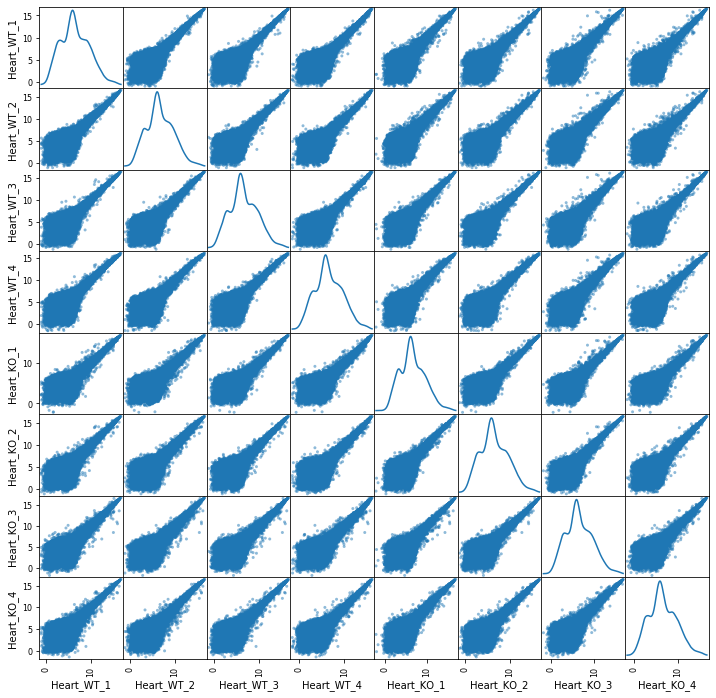

In [94]:
from pandas.plotting import scatter_matrix

scatter_matrix(np.log2(df.iloc[:,0:8]), figsize=(12, 12), diagonal='kde')
plt.show() # this line makes the plot appear

The so-called M-A plot of expression change between KO and WT relative to average expression in these two conditions:

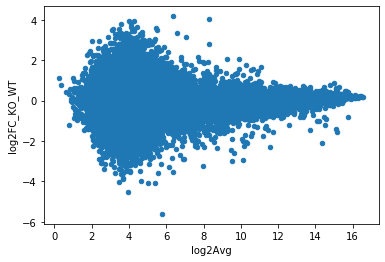

In [95]:
pd.DataFrame(df[['log2FC_KO_WT', 'log2Avg']]).plot(x='log2Avg', y='log2FC_KO_WT', kind='scatter')
plt.show()

Histogram of the log fold changes

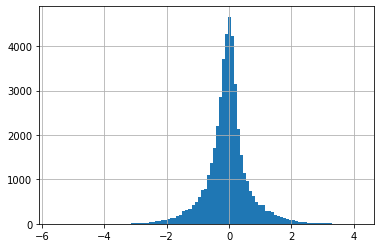

In [96]:
df['log2FC_KO_WT'].hist(bins=100)
plt.show()

Or we can check how well the expression changes fit a gaussian distribution

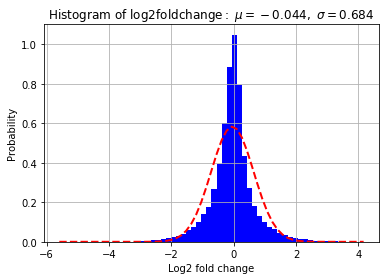

In [103]:
import scipy.stats as stats

# best fit of data with a normal law
(mu, sigma) = stats.norm.fit(df['log2FC_KO_WT'])

# the histogram of the data
n, bins, patches = plt.hist(df['log2FC_KO_WT'], 60, density=1, facecolor='blue', alpha=1)

y = stats.norm.pdf( bins, loc = mu , scale = sigma )
# add a 'best fit' line
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Log2 fold change')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ log2 fold change:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

## Recap of the methods we have covered so far

In [107]:
column_names = ["gene", "Heart_WT_1", "Heart_WT_2", "Heart_WT_3", "Heart_WT_4", "Heart_KO_1", "Heart_KO_2", "Heart_KO_3", "Heart_KO_4"]
df = pd.read_csv("GSE41558_series_matrix_no_header.tsv", sep='\t', header=None)
df.columns = column_names
df.set_index('gene', inplace=True) 
df.head()
df['Heart_WT_avg'] = (df['Heart_WT_1']+df['Heart_WT_2']+df['Heart_WT_3']+df['Heart_WT_4'])/4
df['Heart_KO_avg'] = (df['Heart_KO_1']+df['Heart_KO_2']+df['Heart_KO_3']+df['Heart_KO_4'])/4
df['log2_Heart_KO_avg'] = np.log2(df['Heart_KO_avg'])
df['log2_Heart_WT_avg'] = np.log2(df['Heart_WT_avg'])
df['log2FC_KO_WT'] = np.log2(df['Heart_KO_avg'])-np.log2(df['Heart_WT_avg'])
df['log2Avg'] = np.log2((df['Heart_KO_avg']+df['Heart_WT_avg'])/2)
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg
gene,,,,,,,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400,1199.791750,1139.791575,10.154554,10.228568,-0.074014,10.192036
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340,2989.444000,2764.988500,11.433058,11.545661,-0.112604,11.490458
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350,4287.189750,4271.575500,12.060553,12.065817,-0.005264,12.063187
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668,489.157575,505.357500,8.981161,8.934155,0.047005,8.957849
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060,1383.490250,1489.517500,10.540629,10.434097,0.106533,10.488346


## A deeper look at dataframe functionalities

### Merge and join

[Merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) or [join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) operations combine data sets, linking rows based on their keys. 

Here's how we construct a dataframe from a dictionary data structure, where dictionary keys are treated as column names, list of values associated with a key is treated as list of elements in the corresponding column, and rows are contructed based on the index of elements within the list of elements in the column (note however that all columns should have the same length):

In [108]:
df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'], 'data1': range(7)})
#print(type(df1))
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [109]:
df2 = pd.DataFrame({'key': ['a','b','d'], 'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


Let's merge the two data frames, with the default application of the `merge` function:

In [110]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


How has python interpreted our call to `merge`?

1. It has assumed that we want to merge on the basis of the common `key` column.

2. It has identified the values of `key` which occur in both dataframes

3. It has generated a dataframe with all combinations of rows from dataframes 1 and 2 that are associated with a particular key value

We can be more precise ourselves in specifying how to merge the dataframes, using the **on** option:

In [ ]:
pd.merge(df1, df2, on='key')

By default, merge performs an 'inner' operation, taking the intersection of the key sets. However, we can specify the way we want to merge through options like 'outer', 'left', 'right'. This determines which set of keys to consider (the union of the two sets, all of those that occur in df1, all of those that occur in df2). Missing values show up as NaN.

In [111]:
pd.merge(df1, df2, on='key', how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


Merging can also be done based on index. For this lets use our example that we had before. 

In [113]:
df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4,Heart_WT_avg,Heart_KO_avg,log2_Heart_KO_avg,log2_Heart_WT_avg,log2FC_KO_WT,log2Avg
gene,,,,,,,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400,1199.791750,1139.791575,10.154554,10.228568,-0.074014,10.192036
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340,2989.444000,2764.988500,11.433058,11.545661,-0.112604,11.490458
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350,4287.189750,4271.575500,12.060553,12.065817,-0.005264,12.063187
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668,489.157575,505.357500,8.981161,8.934155,0.047005,8.957849
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060,1383.490250,1489.517500,10.540629,10.434097,0.106533,10.488346


Let's create two data frames, one containing the data for the WT and the other for the KO:

In [116]:
wt_cols = [col for col in df.columns if 'WT' in col and 'avg' not in col and 'log' not in col]
ko_cols = [col for col in df.columns if 'KO' in col and 'avg' not in col and 'log' not in col]
df_WT = df[wt_cols]
df_KO = df[ko_cols]
print(df_WT.head())
print(df_KO.head())

              Heart_WT_1  Heart_WT_2  Heart_WT_3  Heart_WT_4
gene                                                        
1415670_at     1214.4470   1182.4640   1206.2260   1196.0300
1415671_at     3490.0980   2882.7840   2650.0330   2934.8610
1415672_at     4510.3690   4292.0570   4071.0570   4275.2760
1415673_at      598.8334    385.0178    458.4872    514.2919
1415674_a_at   1400.3250   1328.2950   1416.9230   1388.4180
              Heart_KO_1  Heart_KO_2  Heart_KO_3  Heart_KO_4
gene                                                        
1415670_at     1174.6180   1184.4580    985.5503   1214.5400
1415671_at     2723.9760   2823.2600   2721.8840   2790.8340
1415672_at     4127.9410   4045.9900   4553.7360   4358.6350
1415673_at      584.0671    544.3807    569.1154    323.8668
1415674_a_at   1459.9560   1462.9640   1237.2440   1797.9060


Let's merge these frames based on the index:

In [117]:
merged_df = pd.merge(df_WT, df_KO, left_index=True, right_index=True)
merged_df.head()

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060


### Applying functions to dataframe rows or columns

We can write our own functions and `apply` them row-wise or column-wise to our dataframe. 

For example, let's implement our version of the default [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) function.

To see better what's going one, we'll extract a short section of our dataframe:

In [152]:
short_df = df.iloc[0:10,0:8]
short_df

,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
gene,,,,,,,,
1415670_at,1214.4470,1182.4640,1206.2260,1196.0300,1174.6180,1184.4580,985.5503,1214.5400
1415671_at,3490.0980,2882.7840,2650.0330,2934.8610,2723.9760,2823.2600,2721.8840,2790.8340
1415672_at,4510.3690,4292.0570,4071.0570,4275.2760,4127.9410,4045.9900,4553.7360,4358.6350
1415673_at,598.8334,385.0178,458.4872,514.2919,584.0671,544.3807,569.1154,323.8668
1415674_a_at,1400.3250,1328.2950,1416.9230,1388.4180,1459.9560,1462.9640,1237.2440,1797.9060
1415675_at,497.7774,441.8907,463.8198,471.8565,404.6885,357.1436,442.7815,519.2141
1415676_a_at,7927.8970,6705.2780,7242.7060,6859.5690,8368.4340,8531.3290,8547.2470,7839.2850
1415677_at,781.6489,513.3997,481.5474,646.0389,695.0452,768.4124,574.2578,521.8760
1415678_at,5476.5120,4205.5160,5146.7310,4337.7330,5979.4290,5316.2600,5421.7470,5278.3230


In [153]:
# we assume that we get an array/list/Series as input
def calculate_mean(inp):
    
    '''Calculate mean'''
    
    total = 0
    for i in inp:
        total = total + i
    return total/len(inp)
    
    # or just
    # return np.average(inp)

Now we apply the function across columns (axis = 1):

In [154]:
short_df.apply(calculate_mean, axis=1)

gene
1415670_at      1169.791663
1415671_at      2877.216250
1415672_at      4279.382625
1415673_at       497.257538
1415674_a_at    1436.503875
1415675_at       449.896513
1415676_a_at    7752.718125
1415677_at       622.778288
1415678_at      5145.281375
1415679_at      3126.368375
dtype: float64

which gives the same output as the default function:

In [155]:
short_df.mean(axis=1)

gene
1415670_at      1169.791663
1415671_at      2877.216250
1415672_at      4279.382625
1415673_at       497.257538
1415674_a_at    1436.503875
1415675_at       449.896513
1415676_a_at    7752.718125
1415677_at       622.778288
1415678_at      5145.281375
1415679_at      3126.368375
dtype: float64

### Finally, we can reorganize our dataframes using the groupby() function

Let's say we want to group the genes by the direction of their change in the KO. But we'll take again a smaller part of the data frame for this:

In [157]:
short_df = df.iloc[0:10][['log2_Heart_WT_avg', 'log2_Heart_KO_avg', 'log2FC_KO_WT']]

Now let's make an additional column that tells us the direction of the change: 'Upregulated' if the log2FC > 0, 'Downregulated' if the log2FC < 0 and 'Unchanged' if the log2FC == 0. Let's first define our own function for this:

In [185]:
def directionality(x):
    if(x > 0):
        return 'Upregulated'
    elif(x < 0):
        return 'Downregulated'
    else:
        return 'Unchanged'
    

In [188]:
short_df['Type']=short_df['log2FC_KO_WT'].map(directionality)


Then we can group by the type of change and count how many genes were of these three types:

In [189]:
short_df.groupby('Type').count()

,log2_Heart_WT_avg,log2_Heart_KO_avg,log2FC_KO_WT,Type2
Type,,,,
Downregulated,4,4,4,4
Upregulated,6,6,6,6


We can do this on the large dataset as well (we print out the result on only one column):

In [190]:
df['Type']=df['log2FC_KO_WT'].map(directionality)
df.groupby('Type')['Type'].count()

Type
Downregulated    23967
Upregulated      21134
Name: Type, dtype: int64

### Write files to disk

At the end of the analysis we want to save our results so we should write some files out. 

We can use the function [to_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html):

In [191]:
short_df.head().to_csv("short_example.csv")

Or we can export it as tsv

In [192]:
short_df.head().to_csv("short_example.tsv", sep='\t')

Or we can export it without the header

In [193]:
short_df.head().to_csv("short_example_no_header.tsv", sep='\t', header=None)

# Exercises with pandas

## Exercise 01

Create a pandas dataframe where the index consists of the integers from 1-100. 
Remove a few rows from the dataframe. Slice the first rows using  `.iloc` and `.loc` and make sure that you get the expected behavior.


## Exercise 02

Grab the most recent data on:
 * [number of hospitalised person](https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_hospitalized_switzerland_openzh.csv)
 * [canton demographics](https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/demographics.csv)

1. download and read these two data files as pandas `DataFrame`
2. Modify the numbers from "number of people hospitalized" to "number of people hospitalized per 10 000 habitants" for each canton
3. get, for each canton, the date at which the hosptitalization rate was maximal

## Exercise 03

1. Split the original tsv files in three parts. 
2. Read in the three files and use merge/concatenate to regroup them in a big dataframe. 
3. Center each column : substract their mean from their values
4. select from the data-frame only the genes whose expression is above the column-wise average in all the WT samples
